## Сингулярное разложение матрицы

In [1]:
import copy
import matplotlib.pyplot as plt
import random
import numpy as np
import math

In [2]:
def find_max(A):
    m, ib, jb = None, None, None
    for i in range(len(A)):
        for j in range(i,len(A)):
            if i < j:
                if m == None or abs(A[i][j]) > m:
                    m = abs(A[i][j])
                    ib, jb = i, j
    return ib, jb

In [3]:
def error(A_):
    s = 0
    for i in range(len(A_)):
        for j in range(i+1, len(A_)):
            if i < j:
                s += math.pow(A_[i][j], 2)
    return s**0.5

In [4]:
def prois(U, L, D=None):
    if (len(U[0]) == len(L)):
        R = [[sum([U[i][k] * L[k][j] for k in range(len(U[i]))]) for j in range(len(L[0]))] for i in range(len(U))]
        if D != None:
            return prois(R,D)
        return R
    else:
        print('err in Mult')
        exit()

In [5]:
def transpose(A):
    return [[row[i] for row in A] for i in range(len(A[0]))]

In [6]:
def rotate_matrix(A,s,c,i,j):
    res = [[0 for l in range(A)] for k in range(A)]
    for k in range(A):
        res[k][k] = 1
    res[i][i] = c
    res[i][j] = -s
    res[j][i] = s
    res[j][j] = c
    return res

In [7]:
def jacobi(A):
    err = 0.1
    U = None
    while True:
        i, j = find_max(A)
        P = math.pi / 4
        if A[i][i] - A[j][j] != 0:
            P = 2 * A[i][j] / (A[i][i] - A[j][j])
        c = math.cos(math.atan(P) / 2)
        s = math.sin(math.atan(P) / 2)
        rotate = rotate_matrix(len(A),s,c,i,j)
        if U == None:
            U = copy.deepcopy(rotate)
        else:
            U = prois(U, rotate)
        A = prois(prois(transpose(rotate),A),rotate)
        er = error(A)
        if er < err:
            break
    res = []
    for i in range(len(A)):
        vec = [U[j][i] for j in range(len(A))]
        vecs = sum([x**2 for x in vec])**0.5
        if vecs != 0:
            vec = [x / vecs for x in vec]
        res.append([A[i][i],vec])
    return res

In [8]:
def SVD(A, cut=0):
    A1res = sorted(jacobi(prois(transpose(A),A)))[::-1]
    right = [[A1res[i][1][j] for j in range(len(A1res))] for i in range(len(A1res))]
    
    A2res = sorted(jacobi(prois(A,transpose(A))))[::-1]
    left = [[A2res[j][1][i] for j in range(len(A2res))] for i in range(len(A2res))]
    
#     center = copy.deepcopy(A)
    center = [[0 for j in range(len(A[i]))] for i in range(len(A))]
    for i in range(min(len(A),len(A[0]))):
        center[i][i] = A1res[i][0]**0.5
    if cut != 0 and cut < 100:
        f_vert = max(math.floor(len(center) * (100 - cut) / 100),1)
        f_hor = max(math.floor(len(center[0]) * (100 - cut) / 100),1)
        left = [[left[i][j] for j in range(f_vert)] for i in range(len(left))]
        right = [[right[i][j] for j in range(len(right[0]))] for i in range(f_hor)]
        center = [[center[i][j] for j in range(f_hor)] for i in range(f_vert)]
        return left, center, right
    else:
        return left, center, right

In [16]:
A = [[1,0,0,0,2],
     [0,0,3,0,0],
     [0,0,0,0,0],
     [0,4,0,0,0]]

# A = [[2,6,5,2],[5,3,0,1],[-4,0,-5,10]]

# A = [[4,2,1],[2,5,3],[1,3,6]]

# A = [[2,6],[5,3],[-4,0]]

A

[[1, 0, 0, 0, 2], [0, 0, 3, 0, 0], [0, 0, 0, 0, 0], [0, 4, 0, 0, 0]]

In [17]:
L,C,R = SVD(A,50)

In [18]:
np.array(L)

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [19]:
np.array(C)

array([[4., 0.],
       [0., 3.]])

In [20]:
np.array(R)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [21]:
prois(L,C,R)

[[0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 3.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 4.0, 0.0, 0.0, 0.0]]

In [15]:
x = [i for i in range(1,25)]
A = [
[(random.randint(-5,5)) for i in x],
[(random.randint(-10,10)) for i in x],
[(random.randint(-7,7)) for i in x],
]

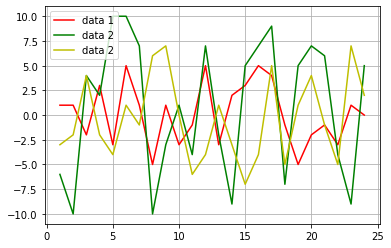

In [16]:
# fig, axs = plt.subplots(4)
plt.plot(x, A[0],'r', label = 'data 1')
plt.plot(x, A[1],'g', label = 'data 2')
plt.plot(x, A[2],'y', label = 'data 2')
plt.grid()
plt.legend()

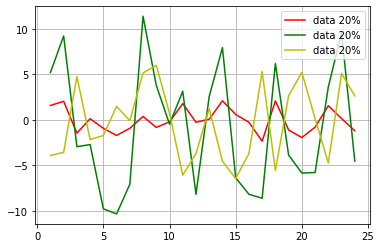

In [17]:
L,C,R = SVD(A,20)
A_ = prois(L,C,R)

plt.plot(x, A_[0],'r', label = 'data 20%')
plt.plot(x, A_[1],'g', label = 'data 20%')
plt.plot(x, A_[2],'y', label = 'data 20%')
plt.grid()
plt.legend()

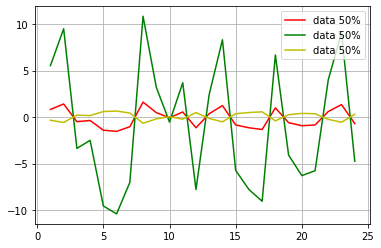

In [18]:
L,C,R = SVD(A,50)
A_ = prois(L,C,R)

plt.plot(x, A_[0],'r', label = 'data 50%')
plt.plot(x, A_[1],'g', label = 'data 50%')
plt.plot(x, A_[2],'y', label = 'data 50%')
plt.grid()
plt.legend()

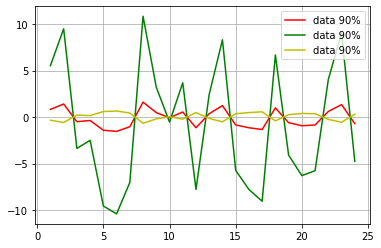

In [19]:
L,C,R = SVD(A,90)
A_ = prois(L,C,R)

plt.plot(x, A_[0],'r', label = 'data 90%')
plt.plot(x, A_[1],'g', label = 'data 90%')
plt.plot(x, A_[2],'y', label = 'data 90%')
plt.grid()
plt.legend()